https://data.hossam.kr/G02/iris.xlsx

from sklearn.datasets import load_iris

iris=load_iris()


#독립변수 가져오기
values=iris.data  ->2차 배열

#독립변수의 이름 가져오기
feature_names=iris.feature_names  ->1차 배열

#종속변수(레이블) 가져오기  ->1차 배열
target=iris.target

해당 데이터를 불러와서 분류를 하여라

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# K-NN분류를 위한 패키지 참조
from sklearn.neighbors import KNeighborsClassifier

# 데이터 표준화 패키지
from sklearn.preprocessing import StandardScaler

# 분류 결과 판정을 위한 패키지
from sklearn import metrics

#경고 메시지 무시하고 싶을때(가급적 비추천)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
origin=read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


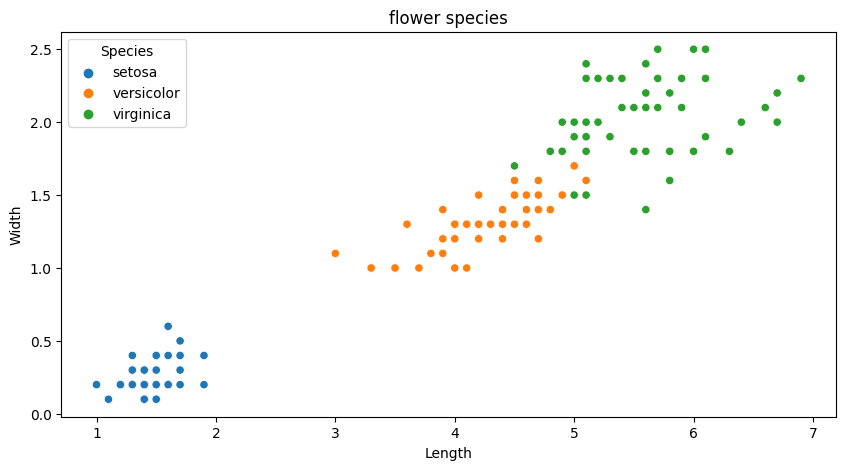

In [3]:
plt.figure(figsize=(10,5))

# sb.scatterplot(data=origin,x='Sepal.Length',y='Sepal.Width',hue='Species')
sb.scatterplot(data=origin,x='Petal.Length',y='Petal.Width',hue='Species')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('flower species')

plt.show()
plt.close()


In [4]:
df=origin.copy()
df['Species']=df['Species'].map({'setosa':0,'versicolor':1,'virginica':2})
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x=df.drop(['Species','Sepal.Length','Sepal.Width'],axis=1)
x

,Petal.Length,Petal.Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
# 근접 이웃의 수를 3으로 설정
k=3

# 모델구성
knn=KNeighborsClassifier(n_neighbors=k)

# 모델 학습
fit=knn.fit(x,y)
fit

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred=knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성해야 한다. 아니면 데이프레임 형태로
newdata_Petal_Length=[1.8]
newdata_Petal_Width=[0.5]
new_data=[[newdata_Petal_Length[0],newdata_Petal_Width[0]]]

flower_classes={0:'setosa',1:'versicolor',2:'virginica'}
new_pred=knn.predict(new_data)

print('데이터: ', new_data, "예측: ", flower_classes[new_pred[0]])

데이터:  [[1.8, 0.5]] 예측:  setosa


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [14]:
dist, indexs=knn.kneighbors(new_data,k)

#첫번째 값은 평면좌표상 거리
#두번째 값은 인덱스값

#거리
print('거리: ',dist)

#인덱스
print('인덱스:', indexs)

거리:  [[0.1        0.14142136 0.14142136]]
인덱스: [[23 44  5]]


c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [11]:
neighbor_Data=origin.values[indexs]
neighbor_Data


array([[[5.1, 3.3, 1.7, 0.5, 'setosa'],
        [5.1, 3.8, 1.9, 0.4, 'setosa'],
        [5.4, 3.9, 1.7, 0.4, 'setosa']]], dtype=object)

In [12]:
for i,v in enumerate(neighbor_Data[0]):
    print(v[2],v[3])
    # print(v[1],v[2])

1.7 0.5
1.9 0.4
1.7 0.4


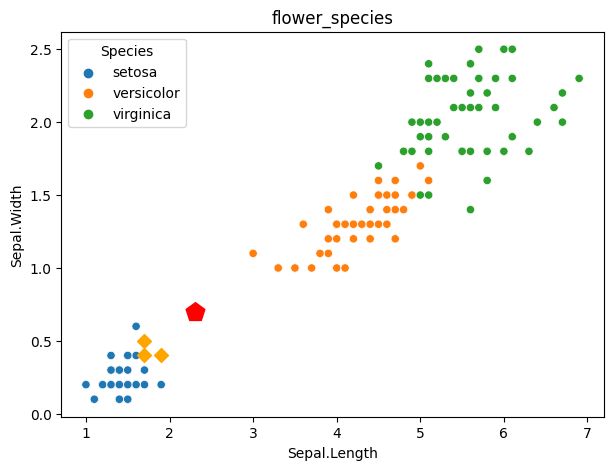

In [13]:
plt.figure(figsize=(7,5))

sb.scatterplot(data=origin,x='Petal.Length',y='Petal.Width',hue='Species')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('flower_species')

#새로운 데이터 투입
newdata_Petal_Length=[2.3]
newdata_Petal_Width=[0.7]
plt.scatter(newdata_Petal_Length,newdata_Petal_Width,marker='p',s=200,c='r',label='new data')

#근접 이웃 표시
for i,v in enumerate(neighbor_Data[0]):
    plt.scatter(v[2],v[3],marker='D',s=50,c='orange',label='neighbor')

plt.show()
plt.close()
